# Extend labels
The `extend_labels_with_maximum_radius` function, which has a counter part in scikit-image called `expand_labels` is a special dilation operation generating a label map corresponding to a simplified Voronoi diagram from a label image. Let's compare performance of the two.

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [1]:
import pyclesperanto_prototype as cle
from skimage import filters
import time

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('RTX')

<Intel(R) UHD Graphics on Platform: Intel(R) OpenCL HD Graphics (1 refs)>

The following example is taken from https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_expand_labels.html

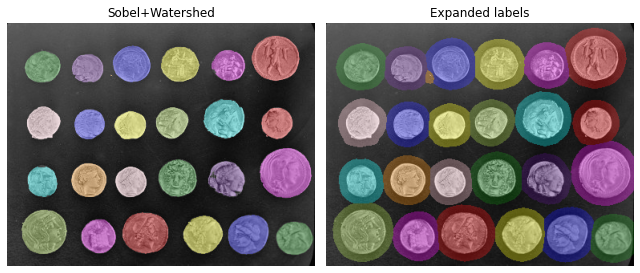

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import watershed, expand_labels
from skimage.color import label2rgb
from skimage import data

coins = data.coins()

# Make segmentation using edge-detection and watershed.
edges = sobel(coins)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 30.0] = background
markers[coins > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

expanded = expand_labels(seg1, distance=10)

# Show the segmentations.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5),
                         sharex=True, sharey=True)

color1 = label2rgb(seg1, image=coins, bg_label=0)
axes[0].imshow(color1)
axes[0].set_title('Sobel+Watershed')

color2 = label2rgb(expanded, image=coins, bg_label=0)
axes[1].imshow(color2)
axes[1].set_title('Expanded labels')

for a in axes:
    a.axis('off')
fig.tight_layout()
plt.show()

In [3]:
# expanding labels with scikit-image
for i in range(0, 10):
    start_time = time.time()
    expanded = expand_labels(seg1, distance=10)
    print("skimage expand_labels duration: " + str(time.time() - start_time))

skimage expand_labels duration: 0.012968063354492188
skimage expand_labels duration: 0.010004997253417969
skimage expand_labels duration: 0.011975765228271484
skimage expand_labels duration: 0.008933544158935547
skimage expand_labels duration: 0.009997844696044922
skimage expand_labels duration: 0.008931875228881836
skimage expand_labels duration: 0.0
skimage expand_labels duration: 0.015656471252441406
skimage expand_labels duration: 0.0
skimage expand_labels duration: 0.015618085861206055


In [4]:
# expanding labels with pyclesperanto
labels_gpu = cle.push_zyx(seg1)

expanded = None

for i in range(0, 10):
    start_time = time.time()
    expanded = cle.extend_labels_with_maximum_radius(labels_gpu, expanded, 10)
    print("pyclesperanto extend_labels_with_maximum_radius duration: " + str(time.time() - start_time))

pyclesperanto extend_labels_with_maximum_radius duration: 0.06679344177246094
pyclesperanto extend_labels_with_maximum_radius duration: 0.015622377395629883
pyclesperanto extend_labels_with_maximum_radius duration: 0.04925227165222168
pyclesperanto extend_labels_with_maximum_radius duration: 0.018586397171020508
pyclesperanto extend_labels_with_maximum_radius duration: 0.015621423721313477
pyclesperanto extend_labels_with_maximum_radius duration: 0.015621423721313477
pyclesperanto extend_labels_with_maximum_radius duration: 0.03236746788024902
pyclesperanto extend_labels_with_maximum_radius duration: 0.015624523162841797
pyclesperanto extend_labels_with_maximum_radius duration: 0.015621423721313477
pyclesperanto extend_labels_with_maximum_radius duration: 0.01914811134338379


## 3D

In [5]:
seg_stack = np.asarray([seg1] * 50)
print(seg_stack.shape)

(50, 303, 384)


In [6]:
# expanding labels with scikit-image
for i in range(0, 10):
    start_time = time.time()
    expanded = expand_labels(seg_stack, distance=10)
    print("skimage expand_labels duration: " + str(time.time() - start_time))

skimage expand_labels duration: 1.0518789291381836
skimage expand_labels duration: 1.0995392799377441
skimage expand_labels duration: 1.0522525310516357
skimage expand_labels duration: 1.0543451309204102
skimage expand_labels duration: 1.0343217849731445
skimage expand_labels duration: 1.0377931594848633
skimage expand_labels duration: 1.0422143936157227
skimage expand_labels duration: 1.073134422302246
skimage expand_labels duration: 1.115753412246704
skimage expand_labels duration: 1.175475835800171


In [7]:
# expanding labels with pyclesperanto
labels_gpu = cle.push_zyx(seg_stack)

expanded = None

for i in range(0, 10):
    start_time = time.time()
    expanded = cle.extend_labels_with_maximum_radius(labels_gpu, expanded, 10)
    print("pyclesperanto extend_labels_with_maximum_radius duration: " + str(time.time() - start_time))

pyclesperanto extend_labels_with_maximum_radius duration: 0.1438426971435547
pyclesperanto extend_labels_with_maximum_radius duration: 0.15584945678710938
pyclesperanto extend_labels_with_maximum_radius duration: 0.1501140594482422
pyclesperanto extend_labels_with_maximum_radius duration: 0.14949774742126465
pyclesperanto extend_labels_with_maximum_radius duration: 0.164229154586792
pyclesperanto extend_labels_with_maximum_radius duration: 0.16852140426635742
pyclesperanto extend_labels_with_maximum_radius duration: 0.17992568016052246
pyclesperanto extend_labels_with_maximum_radius duration: 0.18517732620239258
pyclesperanto extend_labels_with_maximum_radius duration: 0.17927169799804688
pyclesperanto extend_labels_with_maximum_radius duration: 0.18343257904052734
